In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os # accessing directory structure
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler


In [60]:
import warnings
# Отключаем только FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [3]:
df = pd.read_csv('C:/Users/Инна/Desktop/otus/data.csv')

In [4]:
df.shape

(569, 33)

In [5]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [7]:
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
323,895100,M,20.34,21.51,135.90,1264.0,0.11700,0.18750,0.25650,0.15040,...,31.86,171.10,1938.0,0.1592,0.4492,0.5344,0.26850,0.5558,0.10240,NaN
291,8915,B,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,...,26.19,109.10,809.8,0.1313,0.3030,0.1804,0.14890,0.2962,0.08472,NaN
30,853401,M,18.63,25.11,124.80,1088.0,0.10640,0.18870,0.23190,0.12440,...,34.01,160.50,1670.0,0.1491,0.4257,0.6133,0.18480,0.3444,0.09782,NaN
465,9113239,B,13.24,20.13,86.87,542.9,0.08284,0.12230,0.10100,0.02833,...,25.50,115.00,733.5,0.1201,0.5646,0.6556,0.13570,0.2845,0.12490,NaN
338,897880,B,10.05,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,...,26.84,71.98,384.0,0.1402,0.1402,0.1055,0.06499,0.2894,0.07664,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
print(df['diagnosis'].unique())
print(df['Unnamed: 32'].unique())
         

['M' 'B']
[nan]


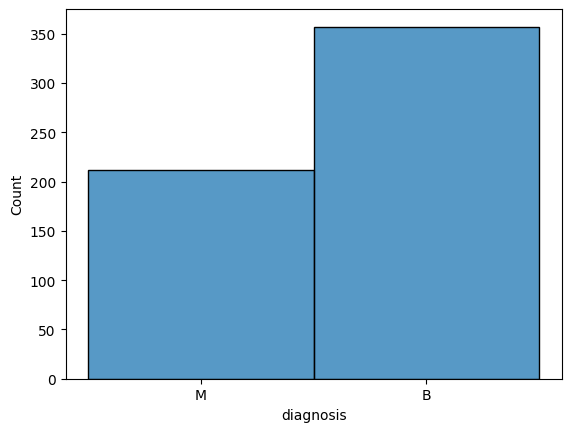

In [10]:
sns.histplot(df['diagnosis'].dropna()); #у нас есть дисбаланс классов, добавить 

In [11]:
#(M = malignant - злокач., B = benign - доброкач.)
df['diagnosis'] = df['diagnosis'].replace({'M': int(1),'B': int(0)})
df['diagnosis'] = df['diagnosis'].astype(int)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [12]:
df.isna().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [13]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [14]:
#удалим ненужные данные

# Список столбцов для удаления (добавьте все нужные)
columns_to_drop = [col for col in df.columns 
                  if 'radius' in col or 'perimeter' in col or 'id' in col or 'points' in col or 'fractal_dimension' in col or 'se' in col or 'worst' in col or 'Unnamed' in col or 'diagnosis' in col]

# Удаляем выбранные столбцы
df_filtered = df.drop(columns=columns_to_drop)

print(f'''
Удалены столбцы:
{columns_to_drop}
''')
print(f'''
Оставшиеся столбцы:
{df_filtered.columns.tolist()}
''')


Удалены столбцы:
['id', 'diagnosis', 'radius_mean', 'perimeter_mean', 'concave points_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


Оставшиеся столбцы:
['texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'symmetry_mean']



In [15]:
corr = df_filtered.select_dtypes(include=['number']).corr()

In [16]:
corr

,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean
texture_mean,1.000000,0.321086,-0.023389,0.236702,0.302418,0.071401
area_mean,0.321086,1.000000,0.177028,0.498502,0.685983,0.151293
smoothness_mean,-0.023389,0.177028,1.000000,0.659123,0.521984,0.557775
compactness_mean,0.236702,0.498502,0.659123,1.000000,0.883121,0.602641
concavity_mean,0.302418,0.685983,0.521984,0.883121,1.000000,0.500667
symmetry_mean,0.071401,0.151293,0.557775,0.602641,0.500667,1.000000


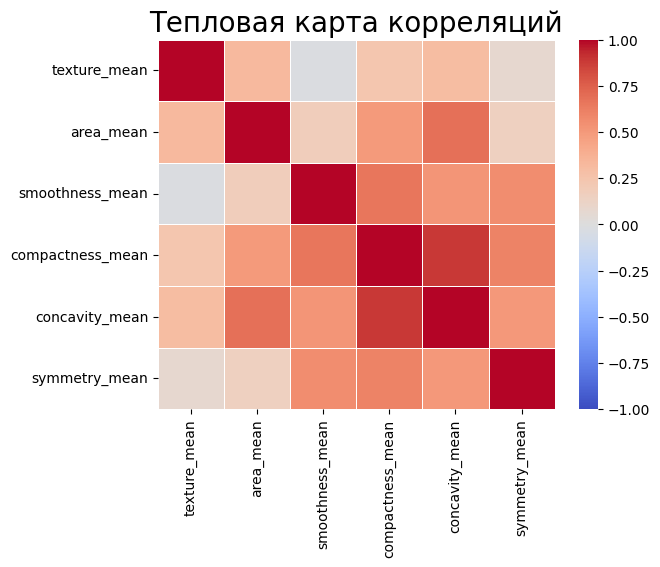

In [17]:
# Рисуем тепловую карту для корреляций

sns.heatmap(
    corr,
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='white',
    vmin=-1,
    vmax=1
)
plt.title('Тепловая карта корреляций', fontsize=20)
plt.show()

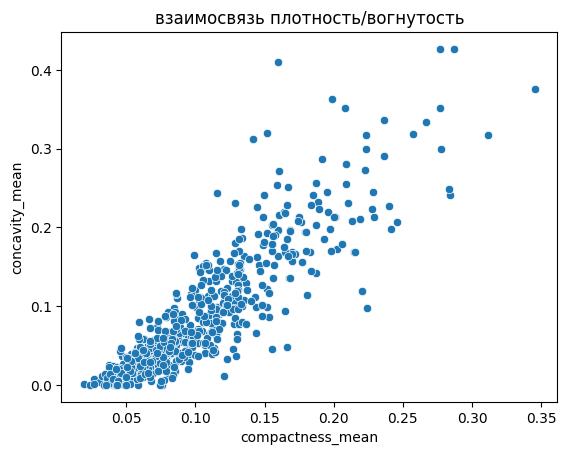

In [18]:
sns.scatterplot(data = df, x = 'compactness_mean', y = 'concavity_mean');
plt.title("взаимосвязь плотность/вогнутость")
plt.show()

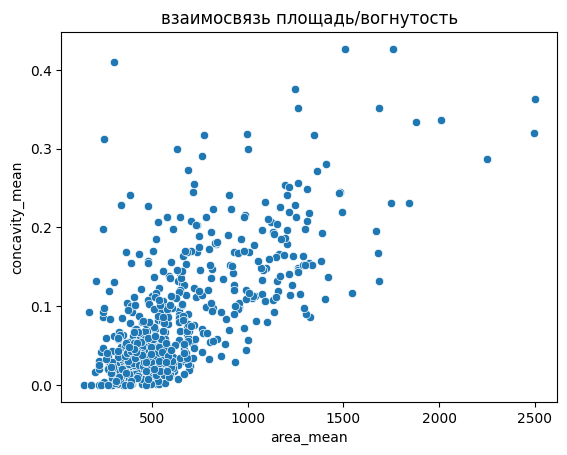

In [19]:
sns.scatterplot(data = df, x= 'area_mean', y= 'concavity_mean');
plt.title('взаимосвязь площадь/вогнутость')
plt.show()

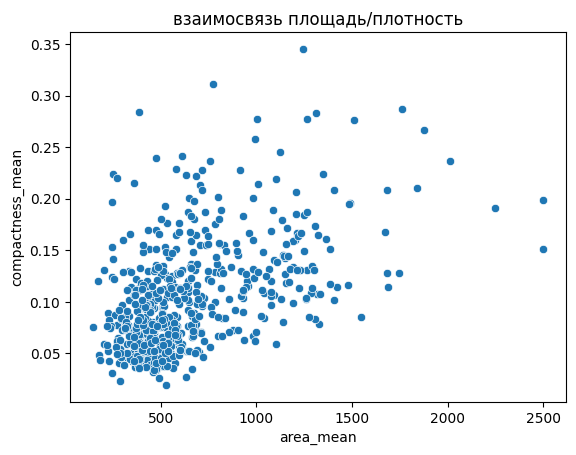

In [20]:
sns.scatterplot(data = df, x= 'area_mean', y= 'compactness_mean');
plt.title('взаимосвязь площадь/плотность')
plt.show()

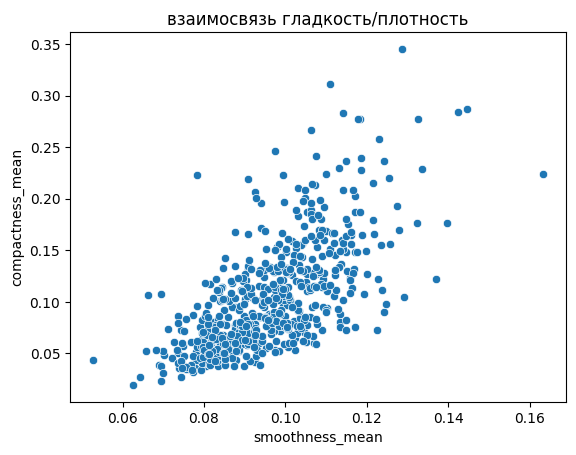

In [21]:
sns.scatterplot(data = df, x= 'smoothness_mean', y= 'compactness_mean');
plt.title('взаимосвязь гладкость/плотность')
plt.show()

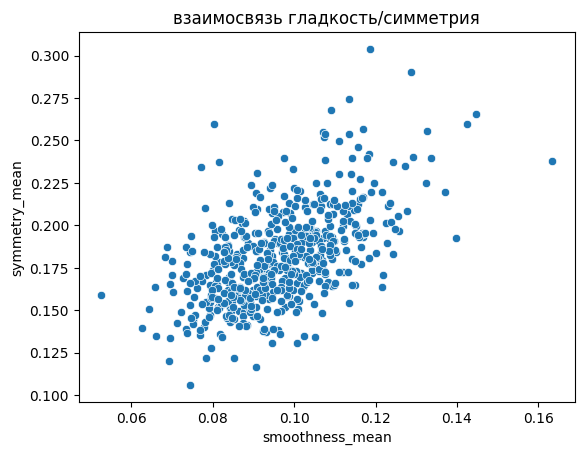

In [22]:
sns.scatterplot(data = df, x= 'smoothness_mean', y= 'symmetry_mean');
plt.title('взаимосвязь гладкость/симметрия')
plt.show()

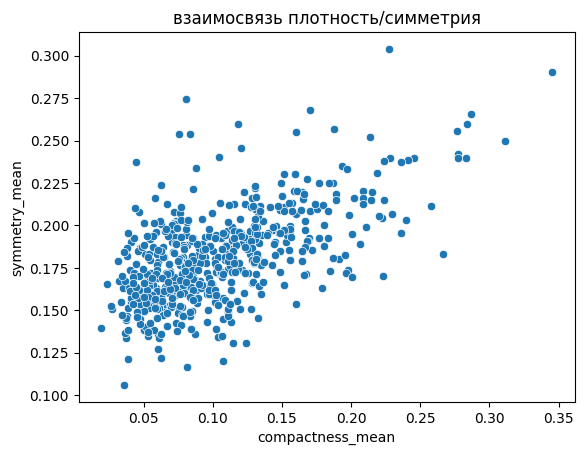

In [23]:
sns.scatterplot(data = df, x= 'compactness_mean', y= 'symmetry_mean');
plt.title('взаимосвязь плотность/симметрия')
plt.show()

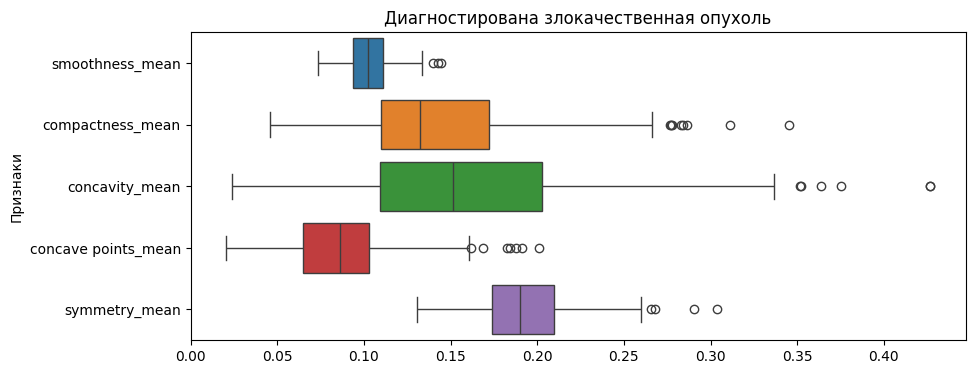

In [24]:
#удалим ненужные данные

df_filtered1 = df[df['diagnosis'] == 1].copy()

# Список столбцов для удаления (добавьте все нужные)
columns_to_drop1 = [
    col for col in df_filtered1.columns 
    if any(term in col for term in [
        'fractal',
        'Unnamed',
        'texture',
        'id', 
        'worst', 
        '_se', 
        'area',
        'radius',
        'perimeter',
        'diagnosis'
    ])
]
# Удаляем выбранные столбцы
df_filtered1 = df_filtered1.drop(columns=columns_to_drop1)



plt.figure(figsize=(10, 4))
sns.boxplot(data = df_filtered1, orient="h")
plt.title("Диагностирована злокачественная опухоль")
plt.ylabel("Признаки")

# Отображение графика
plt.show()
#cкрыть диагноз из боксплота


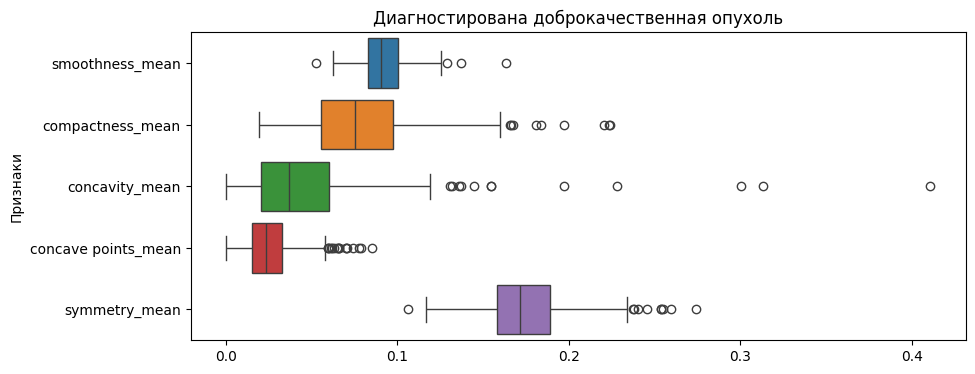

In [25]:
#удалим ненужные данные

df_filtered2 = df[df['diagnosis'] == 0]

# Список столбцов для удаления (добавьте все нужные)
columns_to_drop1 = [
    col for col in df_filtered2.columns 
    if any(term in col for term in [
        'fractal',
        'Unnamed',
        'texture',
        'id', 
        'worst', 
        '_se', 
        'area',
        'radius',
        'perimeter',
        'diagnosis'
    ])
]
# Удаляем выбранные столбцы
df_filtered2 = df_filtered2.drop(columns=columns_to_drop1)


plt.figure(figsize=(10, 4))
sns.boxplot(data = df_filtered2, orient="h")
plt.title("Диагностирована доброкачественная опухоль")
plt.ylabel("Признаки")

# Отображение графика
plt.show()
#cкрыть диагноз из боксплота

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
np.set_printoptions(suppress=True)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor


In [27]:
#определим таргет и признаки
y = df['diagnosis']#target
x = df.drop(['diagnosis', 'id', 'Unnamed: 32'], axis=1)#features


#разделим датасет на данные для обучения и тестов
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# print(x)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


In [28]:
# plt.figure()

# class_0 = x[y == 0]
# class_1 = x[y == 1]
# plt.scatter(class_0[:, 0], class_0[:, 1], label='0 класс')
# plt.scatter(class_1[:, 0], class_1[:, 1], label='1 класс')

# plt.legend()
# plt.xlabel('X')
# plt.ylabel('y');

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Original class distribution:", pd.Series(y_train).value_counts())
print("SMOTE class distribution:", pd.Series(y_train_smote).value_counts())




Original class distribution: diagnosis
0    249
1    149
Name: count, dtype: int64
SMOTE class distribution: diagnosis
0    249
1    249
Name: count, dtype: int64


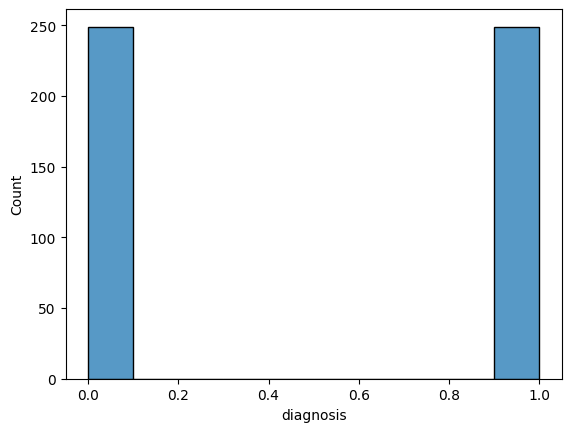

In [30]:
sns.histplot(y_train_smote);

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()#cтандартизация, нужна для устанения большого разброса данных
scaler.fit(X_train_smote)

StandardScaler()

In [32]:
scaler.mean_

array([ 14.84906511,  19.56982635,  96.94995906, 726.60332676,
         0.09727283,   0.11057987,   0.10195055,   0.05622811,
         0.18274731,   0.06253923,   0.44348476,   1.19532708,
         3.1298351 ,  47.20280403,   0.00696256,   0.02628584,
         0.03381466,   0.01239339,   0.02025918,   0.00379197,
        17.29394242,  26.16763221, 114.25853107, 997.54839354,
         0.13413674,   0.27000799,   0.30242949,   0.1272175 ,
         0.29496849,   0.0846649 ])

In [33]:
X_train_smote.mean()

radius_mean                 14.849065
texture_mean                19.569826
perimeter_mean              96.949959
area_mean                  726.603327
smoothness_mean              0.097273
compactness_mean             0.110580
concavity_mean               0.101951
concave points_mean          0.056228
symmetry_mean                0.182747
fractal_dimension_mean       0.062539
radius_se                    0.443485
texture_se                   1.195327
perimeter_se                 3.129835
area_se                     47.202804
smoothness_se                0.006963
compactness_se               0.026286
concavity_se                 0.033815
concave points_se            0.012393
symmetry_se                  0.020259
fractal_dimension_se         0.003792
radius_worst                17.293942
texture_worst               26.167632
perimeter_worst            114.258531
area_worst                 997.548394
smoothness_worst             0.134137
compactness_worst            0.270008
concavity_wo

In [34]:
scaler.scale_

array([  3.74893186,   4.150865  ,  25.74827012, 388.91655206,
         0.01351929,   0.05095675,   0.08042219,   0.03959617,
         0.02637554,   0.00701432,   0.30664808,   0.48939461,
         2.18773149,  53.52431383,   0.00297936,   0.01722446,
         0.02807687,   0.00587431,   0.00806652,   0.00243449,
         5.1599395 ,   5.88133763,  35.36319501, 633.18587852,
         0.02227415,   0.14678295,   0.19550309,   0.06512147,
         0.06368719,   0.0170684 ])

In [35]:
X_train_smote.std()

radius_mean                  3.752702
texture_mean                 4.155039
perimeter_mean              25.774161
area_mean                  389.307620
smoothness_mean              0.013533
compactness_mean             0.051008
concavity_mean               0.080503
concave points_mean          0.039636
symmetry_mean                0.026402
fractal_dimension_mean       0.007021
radius_se                    0.306956
texture_se                   0.489887
perimeter_se                 2.189931
area_se                     53.578134
smoothness_se                0.002982
compactness_se               0.017242
concavity_se                 0.028105
concave points_se            0.005880
symmetry_se                  0.008075
fractal_dimension_se         0.002437
radius_worst                 5.165128
texture_worst                5.887251
perimeter_worst             35.398754
area_worst                 633.822566
smoothness_worst             0.022297
compactness_worst            0.146931
concavity_wo

In [36]:
X_train_std = pd.DataFrame(scaler.transform(X_train_smote), columns=X_train_smote.columns)
X_train_std

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.295835,-0.399875,-0.342934,-0.364097,-1.319065,-0.918816,-0.909457,-1.084401,-1.343946,-0.960782,...,-0.378675,-0.630406,-0.482664,-0.429018,-1.662319,-0.596854,-0.746942,-1.029269,-0.941610,-0.850982
1,-0.394530,-0.766064,-0.421386,-0.445091,-1.932263,-0.732579,-0.261502,-0.712900,-1.537307,-0.614348,...,-0.587980,-0.581098,-0.629709,-0.577158,-1.420334,-0.115190,0.145115,-0.574887,-1.415803,-0.491253
2,-0.042429,-1.346665,0.049325,-0.181281,0.431026,1.432983,0.535293,0.171024,0.980177,1.642465,...,-0.161619,-1.330927,-0.004483,-0.297461,-0.131845,0.636941,0.099592,-0.252106,-0.192637,0.434434
3,-0.517231,-0.780518,-0.560036,-0.540484,-1.321284,-1.117023,-0.786108,-0.819729,0.005789,-0.836750,...,-0.661625,-0.708620,-0.663077,-0.626907,-1.097090,-0.813500,-0.644642,-0.688982,0.116688,-0.889064
4,-0.327844,0.881786,-0.379053,-0.394438,-0.355997,-0.846009,-0.897893,-0.803060,-0.619790,-0.645712,...,-0.376737,0.496888,-0.471635,-0.422859,-0.562838,-0.806006,-1.010365,-0.851908,-0.483119,-0.886721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,1.070201,0.690920,1.068330,0.983266,0.200983,0.814660,0.819406,0.838875,0.667175,-0.124277,...,1.085589,0.872470,1.027290,0.968684,0.112601,0.966448,0.734591,0.867782,0.520053,0.110013
494,-0.049278,0.761820,0.049648,-0.173614,0.380786,1.160344,0.691650,0.556375,-0.163021,0.345879,...,-0.247075,0.414868,0.100998,-0.328606,0.073332,1.237474,0.898303,0.560501,0.376679,0.407837
495,0.997561,-0.176142,0.950767,0.881651,0.139967,0.373842,0.580940,0.856165,0.102730,0.347682,...,1.122815,-0.320190,0.943179,0.958236,0.180613,0.279830,0.472192,0.684068,-0.266897,0.556131
496,-0.782307,-0.188629,-0.719258,-0.720990,1.032108,0.815322,0.232548,-0.103058,1.779093,2.182518,...,-0.089954,0.332098,0.135244,-0.171371,1.330357,2.036734,1.921846,0.421110,2.743883,3.193717


In [37]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)
X_train_std.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,498.0000,498.0000,498.0000,498.0000,498.0000,498.0000,498.0000,498.0000,498.0000,498.0000,...,498.0000,498.0000,498.0000,498.0000,498.0000,498.0000,498.0000,498.0000,498.0000,498.0000
mean,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,...,0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000
std,1.0010,1.0010,1.0010,1.0010,1.0010,1.0010,1.0010,1.0010,1.0010,1.0010,...,1.0010,1.0010,1.0010,1.0010,1.0010,1.0010,1.0010,1.0010,1.0010,1.0010
min,-1.9094,-2.3754,-1.8879,-1.4301,-2.5713,-1.7898,-1.2677,-1.4200,-2.5041,-1.7934,...,-1.6698,-2.4055,-1.6901,-1.2223,-2.3744,-1.6057,-1.5469,-1.9535,-2.1742,-1.7357
25%,-0.7353,-0.6613,-0.7353,-0.7107,-0.7303,-0.7792,-0.8205,-0.8270,-0.6909,-0.6753,...,-0.7639,-0.7044,-0.7659,-0.7098,-0.6773,-0.7297,-0.8191,-0.8168,-0.6362,-0.6896
50%,-0.2612,-0.0590,-0.2787,-0.3431,-0.0232,-0.1162,-0.1628,-0.1884,-0.0568,-0.1809,...,-0.2563,-0.0257,-0.2382,-0.3479,0.0163,-0.1772,-0.0612,-0.0151,-0.1375,-0.1659
75%,0.6809,0.5404,0.6437,0.5439,0.6012,0.6441,0.6209,0.7423,0.5451,0.4741,...,0.6542,0.7099,0.6365,0.4965,0.6584,0.6512,0.6611,0.7831,0.4037,0.4582
max,3.5373,4.7484,3.5556,4.5624,4.8913,3.9410,4.0393,3.6613,4.5972,4.9756,...,3.6330,3.9740,3.8724,5.1430,3.7830,4.5502,3.0740,2.2785,5.7913,5.1754


In [38]:
X_test_std = pd.DataFrame(scaler.transform(X_test), columns=X_train_smote.columns)
X_test_std.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,171.0000,171.0000,171.0000,171.0000,171.0000,171.0000,171.0000,171.0000,171.0000,171.0000,...,171.0000,171.0000,171.0000,171.0000,171.0000,171.0000,171.0000,171.0000,171.0000,171.0000
mean,-0.2228,0.0057,-0.2194,-0.2136,0.0011,-0.0750,-0.1424,-0.1564,0.0152,0.0812,...,-0.2068,-0.0154,-0.2046,-0.1894,-0.0170,-0.0251,-0.1107,-0.1662,-0.0119,0.0136
std,0.9348,1.0829,0.9468,0.8638,1.0898,1.1079,1.0464,1.0437,1.0851,0.9427,...,0.9544,1.0943,0.9863,0.8967,1.0051,1.1979,1.2047,1.0750,0.9544,1.1300
min,-2.0987,-2.2140,-2.0646,-1.4993,-3.3022,-1.7101,-1.2677,-1.4200,-2.9098,-1.7534,...,-1.8147,-2.3256,-1.8055,-1.2830,-2.8269,-1.6536,-1.5469,-1.9535,-2.1726,-1.5242
25%,-0.8853,-0.7986,-0.8894,-0.8211,-0.7155,-0.8537,-0.9005,-0.9238,-0.7316,-0.6165,...,-0.9048,-0.8565,-0.9232,-0.8083,-0.5943,-0.8373,-0.9776,-0.9414,-0.6527,-0.7318
50%,-0.3732,-0.1108,-0.3740,-0.4479,0.0390,-0.2900,-0.5231,-0.5808,-0.1117,-0.0997,...,-0.4601,-0.0931,-0.4714,-0.5048,0.0073,-0.3611,-0.3695,-0.4026,-0.1581,-0.3008
75%,0.1950,0.6879,0.2330,0.0801,0.6788,0.3674,0.4228,0.4443,0.5517,0.5875,...,0.3306,0.7256,0.3349,0.1973,0.5214,0.3798,0.3975,0.6424,0.4111,0.5124
max,2.7664,2.7826,2.8953,2.9605,2.9460,4.6082,4.0343,3.2395,4.0891,2.8357,...,2.9450,3.5693,2.8205,3.8448,3.9716,5.3684,4.8571,2.5150,3.9102,7.1966


In [39]:
X_train_smote['area_mean'].max(), X_test['area_mean'].max()

(np.float64(2501.0), np.float64(1878.0))

In [40]:
knn = KNeighborsClassifier()#обучение
knn.fit(X_train_std, y_train_smote)


KNeighborsClassifier()

In [41]:
pred_train = knn.predict(X_train_std)
pred_test = knn.predict(X_test_std)

print(f'Train R2 {r2_score(y_train_smote, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')


Train R2 0.91
Test R2 0.80


In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_std, y_train_smote)


LinearRegression()

In [43]:
pred_train = lr.predict(X_train_std)
pred_test = lr.predict(X_test_std)


print(f'Train R2 {r2_score(y_train_smote, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.79
Test R2 0.69


In [44]:
k_range = range(1, 26)
scores = {}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_smote,y_train_smote)
  y_pred = knn.predict(X_test)
  scores[k] = metrics.accuracy_score(y_test, y_pred)
  scores_list.append(metrics.accuracy_score(y_test, y_pred))

In [45]:
scores

{1: 0.9473684210526315,
 2: 0.935672514619883,
 3: 0.9239766081871345,
 4: 0.9298245614035088,
 5: 0.9298245614035088,
 6: 0.9532163742690059,
 7: 0.9298245614035088,
 8: 0.9415204678362573,
 9: 0.9532163742690059,
 10: 0.9532163742690059,
 11: 0.9473684210526315,
 12: 0.9590643274853801,
 13: 0.9590643274853801,
 14: 0.9707602339181286,
 15: 0.9707602339181286,
 16: 0.9707602339181286,
 17: 0.9707602339181286,
 18: 0.9649122807017544,
 19: 0.9590643274853801,
 20: 0.9707602339181286,
 21: 0.9707602339181286,
 22: 0.9707602339181286,
 23: 0.9707602339181286,
 24: 0.9649122807017544,
 25: 0.9649122807017544}

Text(0, 0.5, 'accuracy')

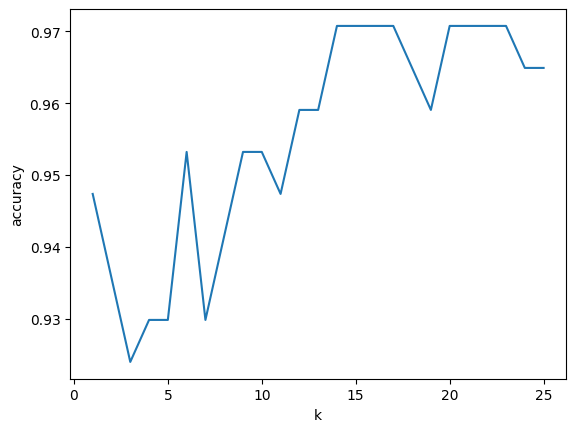

In [46]:
plt.plot(k_range, scores_list)
plt.xlabel('k')
plt.ylabel('accuracy')
#вывод: предсказание хорошее, но его нельзя использовать так как у нас есть дизбаланс класса

In [47]:
knn = KNeighborsClassifier(n_neighbors=3)# попробуем предсказать подставив реальные данные из датасета
knn.fit(x,y)

KNeighborsClassifier(n_neighbors=3)

In [48]:
classes = {0:'доброкач', 1:'злокач'}

In [49]:
x_new = np.array([[
20.55, 20.86, 137.8, 1308, 0.1046, 0.1739, 0.2085, 0.1322, 0.2127, 0.06251, 0.6986, 0.9901, 4.706, 87.78, 0.004578, 0.02616,0.04005,0.01421,0.01948,0.002689,24.3,25.48,160.2,1809,0.1268,0.3135,0.4433,0.2148,0.3077,0.07569
]])
x_new1 = np.array([[
14.59,22.68,96.39,657.1,0.08473,0.133,0.1029,0.03736,0.1454,0.06147,0.2254,1.108,2.224,19.54,0.004242,0.04639,0.06578,0.01606,0.01638,0.004406,15.48,27.27,105.9,733.5,0.1026,0.3171,0.3662,0.1105,0.2258,0.08004
]])

In [61]:
y_predict = knn.predict(x_new)
y_predict1 = knn.predict(x_new1)

C:\Users\Инна\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Инна\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [62]:
print(classes[y_predict[0]])
print(classes[y_predict1[0]])
#ответы получились верные

злокач
доброкач


(171,) (171,)


(0      0
 1      0
 2      0
 3      0
 4      0
       ..
 493    1
 494    1
 495    1
 496    1
 497    1
 Name: diagnosis, Length: 498, dtype: int64,
 array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]))

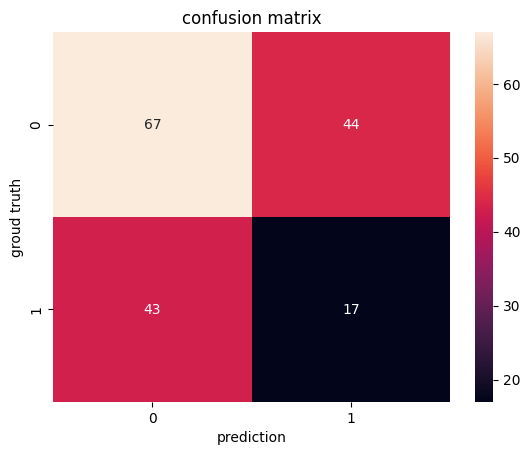

In [52]:
from sklearn.metrics import confusion_matrix 

# diagnosis_true = df['diagnosis'].iloc[:171] #посчитаем метрику precision
# diagnosis_true = y_train_smote
cm = confusion_matrix(y_train_smote.iloc[:171], y_pred)
sns.heatmap(cm, annot=True)

plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('groud truth');
print(y_train_smote.iloc[:171].shape, y_pred.shape)
y_train_smote, y_pred # посмотрим "глазами" на кол-во верных ответов


In [53]:
from sklearn.metrics import precision_score

precision_score(y_pred, y_train_smote.iloc[:171])

0.2833333333333333

In [54]:
cm = confusion_matrix(y_pred, y_train_smote.iloc[:171])
tp = cm[1][1]
fp = cm[0][1]

precision_1_model = tp / (tp + fp)
precision_1_model

np.float64(0.2833333333333333)

In [55]:

from sklearn.metrics import precision_score

precision_score(y_pred, y_train_smote.iloc[:171])
#делаем вывод что предсказание низкого качества 

0.2833333333333333

In [64]:
#посчитаем метрику recall вручную и с пом. ф-ции из sklearn
cm = confusion_matrix(y_pred, y_train_smote.iloc[:171])
tp = cm[1][1]
fn = cm[1][0]

recall_1_model = tp / (tp + fn)
recall_1_model

np.float64(0.2786885245901639)

In [57]:
from sklearn.metrics import recall_score

recall_score(y_pred, y_train_smote.iloc[:171])

0.2786885245901639

In [58]:
#делаем вывод что предсказание низкого качества 

In [59]:
#кросс валидацию взять из файла из лекции по кнн